#What is naive bayes?
- supervised learning classification algorithm, which is based on bayes thoerem and used for solving classification problems.
- It predicts the category or class of data based on probabilities.
- Naive- makes assumptions that that the features are independent of each other which is highly unlikely in real data.(Order of words in text doesnot matter) therefore cannot be used for regression purpose.
- can perform poorly if this assumption is highly violated.
- fast, works well with sparse data
- works well with high dimensional data (text)
- text analysis, text mining, nlp tasks
- spam filtering, sentiment analysis, medical diagnosis, inappropraite comments detection
- P(C∣X)=
P(X)
P(X∣C)⋅P(C)
​

𝑃
(
𝐶
∣
𝑋
)
P(C∣X): Posterior – probability of class
𝐶
C given data
𝑋
X

𝑃
(
𝑋
∣
𝐶
)
P(X∣C): Likelihood – probability of data
𝑋
X given class
𝐶
C

𝑃
(
𝐶
)
P(C): Prior – probability of class
𝐶
C

𝑃
(
𝑋
)
P(X): Evidence – probability of data
𝑋
X



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Naive Bayes/heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


- outlier detection is avoided since it is sparse data
- label encoding is not required

In [13]:
c=df.corr()
c

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

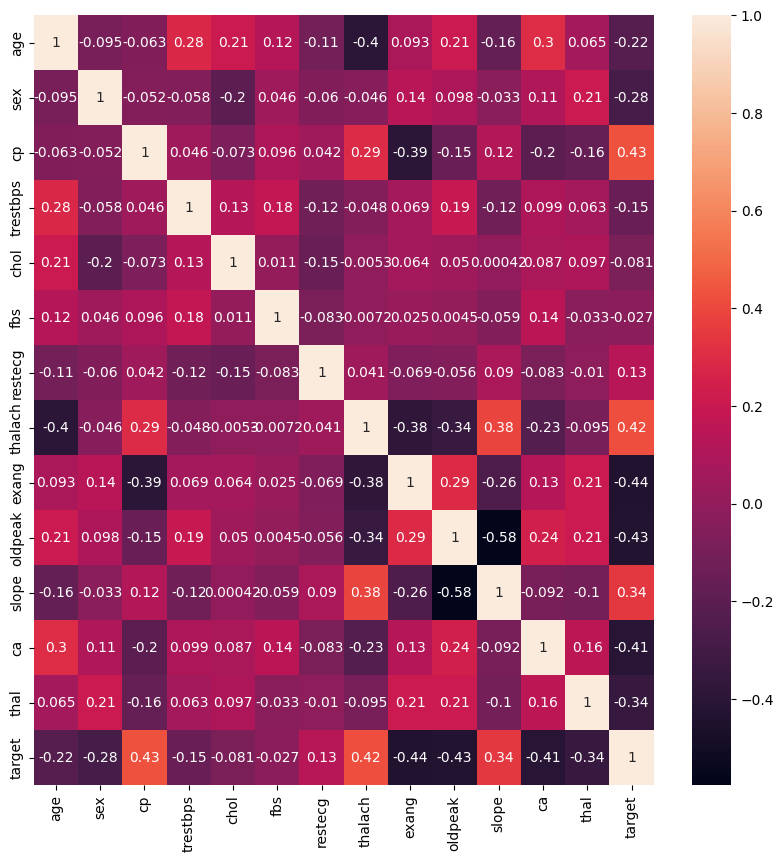

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(c,annot=True)

#TYPES OF NAIVE BAYES:
1. Gaussian Naive Bayes
  - For continuous numeric data
  - assume features follow a normal/gaussian distribution.
  - **Example** : Predicting disease on: BP, Body Temperature, Heart Rate

2. Multinomial Naive Bayes
  - For count data(discrete values)
  - Perfect for NLP tasks
  - Often used for text classification
  - **Example** : Spam Detection: counting words like "free", "win", "disappear"

3. Bernoulli Naive Bayes
  - For binary/boolean features(0 or 1)
  - Features are present/absent, yes/no, true/false
  - works with text data, but works on whether the word appears or not
  - **Example** : Spam detection: whether mail has win or not

4. Categorical Naive Bayes
  - Categorical features(non-numeric, non-ordered categories)
  - **Example**: Predicting pet insurance claim:
      - Animal type = cat/dog
      - Breed = Labrador/ Husky
      - Indoor/Outdoor = Yes/ No

In [17]:
#Split the data
x=df.drop("target",axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y=df['target']
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [22]:
#Splitting data into training and testing data sets
from sklearn.model_selection import train_test_split


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [24]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [25]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [26]:
y_train

,target
132,1
203,0
197,0
75,1
177,0
...,...
189,0
71,1
106,1
271,0


In [27]:
y_test

,target
180,0
229,0
111,1
247,0
60,1
...,...
250,0
104,1
300,0
194,0


In [28]:
from sklearn.naive_bayes import *
from sklearn.metrics import *

In [29]:
#Gaussian
model1=GaussianNB()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8852459016393442


In [30]:
confusion_matrix(y_test,y_pred)

array([[27,  2],
       [ 5, 27]])

In [31]:
#Multinomial
model2=MultinomialNB()
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.819672131147541


In [32]:
confusion_matrix(y_test,y_pred)

array([[24,  5],
       [ 6, 26]])

In [33]:
#Bernoulli
model3 = BernoulliNB()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8688524590163934


In [34]:
confusion_matrix(y_test,y_pred)

array([[25,  4],
       [ 4, 28]])

In [35]:
#Categorical
model4 = CategoricalNB()
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8524590163934426


In [36]:
confusion_matrix(y_test,y_pred)

array([[24,  5],
       [ 4, 28]])

#Spam Filtering

In [37]:
spam_df=pd.read_csv('/content/drive/MyDrive/Naive Bayes/emails.csv')

In [38]:
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [39]:
spam_df.isnull().sum().sum()

np.int64(0)

In [40]:
spam_df.duplicated().sum()

np.int64(33)

In [44]:
spam_df.drop_duplicates(inplace=True)

In [46]:
#check for imbalance data
spam_df['spam'].value_counts()

,count
spam,
0,4327
1,1368


 Vectorizing the text column using CountVectorizer Class

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
vectorizer=CountVectorizer()
vectorized_text=vectorizer.fit_transform(spam_df['text'])
vectorized_text.shape

(5695, 37303)

In [52]:
vectorizer.get_feature_names_out()[11000:11100]

array(['deducted', 'deductible', 'deductionhome', 'deductions', 'dee',
       'deed', 'deeds', 'deeff', 'deejaymail', 'deem', 'deemed', 'deep',
       'deepa', 'deepak', 'deepen', 'deepened', 'deeper', 'deepest',
       'deeplook', 'deeply', 'deepscan', 'deepti', 'deepwater', 'deer',
       'dees', 'def', 'default', 'defaultable', 'defaulted', 'defaulter',
       'defaulters', 'defaulting', 'defaults', 'defeat', 'defeatist',
       'defective', 'defectors', 'defence', 'defend', 'defendable',
       'defended', 'defending', 'defense', 'defensively', 'defer',
       'deference', 'deferral', 'deferred', 'defferal', 'deffner',
       'deficiency', 'deficit', 'deficits', 'defiled', 'definate',
       'definately', 'definatly', 'define', 'defined', 'defines',
       'definetly', 'defining', 'definining', 'definite', 'definitely',
       'definition', 'definitions', 'definitive', 'deflect', 'deform',
       'deformed', 'defs', 'defunct', 'defuse', 'degenerate',
       'degenerative', 'degeorg

Machine Learning Process

In [53]:
X=vectorized_text.toarray()
y=spam_df['spam']

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
multi_nb = MultinomialNB()
multi_nb.fit(X_train, y_train)
y_pred = multi_nb.predict(X_test)
roc_auc_score(y_test, y_pred)

np.float64(0.9918766631400083)

In [56]:
emails = ['Congratulations, you have a pre-approved loan of 5000 US Dollars. No documentation required.',
          'Can we have a quick meeting tomorrow at 5 PM ?']

In [57]:
transformed_emails = vectorizer.transform(emails)

In [58]:
multi_nb.predict(transformed_emails)

array([1, 0])

In [ ]:
#this means that first email is spam, second is not.